In [ ]:
# This notebook contains 2 machine learning models that predict the
# Element of a future Genshin Impact character released based on the entered version number and rarity
# One model uses the Decision Tree model and the other uses K-Nearest Neighbours classification

import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score

In [ ]:
# Decision Tree Classification model
# Char.csv: csv containing all characters' name, weapon, element, rarity & release version up to version 4.1
# read file and format data into numpy array

with open("Char.csv") as file:
  x_data = []
  y_data = []
  for item in file:
    y_data.append(item.rstrip("\n").split(",")[1])
    x_data.append((item.rstrip("\n").split(",")[-1], item.rstrip("\n").split(",")[-3]))

# file automatically closed after with block
# remove headers
x_data = x_data[1:]
y_data = y_data[1:]

x_data = np.array(x_data)
y_data = np.array(y_data)

# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=5)

dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# fit dt
dt.fit(x_train, y_train)

# predict
y_pred = dt.predict(x_test)

# evaluate accuracy
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))

print()

print("Test data predictions: ")
for i in range(len(y_pred)):
  print(x_test[i], y_pred[i])

print()
print("Prediction: ")
print(dt.predict(np.array([('4.2', '4')])))


Accuracy: 0.07

Test data predictions: 
['3' '5'] Electro
['1.1' '5'] Pyro
['2' '5'] Pyro
['3' '4'] Electro
['1.6' '5'] Pyro
['2.1' '4'] Pyro
['2.4' '5'] Pyro
['4' '5'] Cryo
['2.7' '5'] Electro
['3.5' '4'] Dendro
['1' '5'] Pyro
['4' '4'] Cryo
['2' '4'] Pyro
['2' '5'] Pyro
['1' '4'] Pyro

Prediction: 
['Cryo']


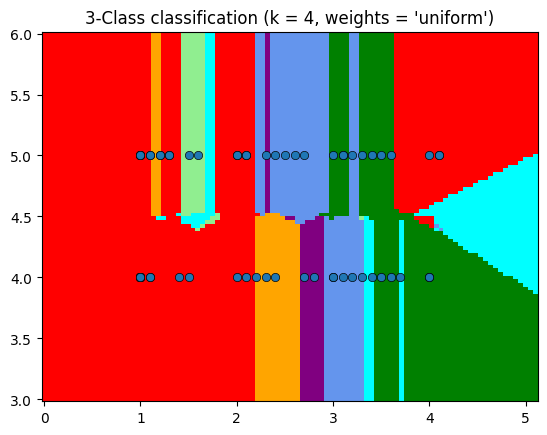

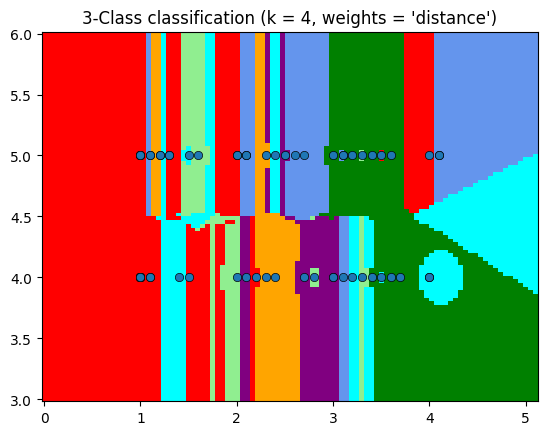

Accuracy:  0.25

Test data predictions: 
[1.5 4. ] Pyro
[2. 5.] Pyro
[2.7 5. ] Hydro
[1.1 5. ] Geo
[2.6 5. ] Cryo
[1.3 5. ] Geo
[2.1 5. ] Pyro
[4. 4.] Cryo

Prediction: 
Cryo


In [ ]:
# K Nearest Neighbors Classification model

k = 4               # K-param for adjustment

# read file and format data into numpy array
with open("Char.csv") as file:
  x_data = []       # element
  y_data = []       # version & rarity
  lst = ["Pyro", "Hydro", "Cryo", "Electro", "Dendro", "Geo", "Anemo"]
  header = next(file)

  for item in file:
    y_data.append(lst.index(item.rstrip("\n").split(",")[1]))
    x_data.append((float(item.rstrip("\n").split(",")[-1]), int(item.rstrip("\n").split(",")[-3])))

x_data = np.array(x_data)
y_data = np.array(y_data)

# plot decision boundary
# color map for plot
cmap_light = ListedColormap(["red", "cornflowerblue", "cyan", "purple", "green", "orange", "lightgreen"])

for weights in ["uniform", "distance"]:
    # create classifier & fit data
    clf = neighbors.KNeighborsClassifier(k, weights=weights)
    clf.fit(x_data, y_data)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        x_data,
        cmap = cmap_light,
        ax = ax,
        response_method = "predict",
        plot_method = "pcolormesh"
    )

    # plot training points
    sns.scatterplot(
        x = x_data[:, 0],
        y = x_data[:, 1],
        alpha = 1.0,
        edgecolor = "black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (k, weights)
    )

plt.show()

# train test split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state=1)
clf = neighbors.KNeighborsClassifier(k, weights = "uniform")
clf.fit(x_train, y_train)

# calculate model accuracy
print("Accuracy: ", accuracy_score(y_test, clf.predict(x_test)))

# print predictions from test data
y_pred = clf.predict(x_test)

print()
print("Test data predictions: ")
for i in range(len(y_pred)):
  print(x_test[i], lst[int(y_pred[i])])

# predict element based on version and rarity
print()
print("Prediction: ")
print(lst[clf.predict(np.array([(4.2, 4)]))[0]])

In [ ]:
# user input to predict with different models
version = float(input("Enter version number: "))
rarity = int(input("Enter rarity: "))
print()
print("Decision Tree Prediction: ", dt.predict(np.array([(str(version), str(rarity))]))[0])
print("KNN Prediction: ", lst[clf.predict(np.array([(version, rarity)]))[0]])

Enter version number: 3.2
Enter rarity: 5

Decision Tree Prediction:  Dendro
KNN Prediction:  Hydro
